In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/Deepfold2


In [4]:
import h5py

In [58]:
with h5py.File('data/icSHAPE/Spitale_2015_invitro/CDS', 'r') as f:
    icshape_data = {}
    icshape_data['name'] = f['name'][:]
    icshape_data['start'] = f['start'][:]
    icshape_data['end'] = f['end'][:]
    icshape_data['feature'] = {}
    icshape_data['meta'] = {}
    for key in f['feature']:
        icshape_data['feature'][key] = f['feature'][key][:]
    for key in f['meta']:
        icshape_data['meta'][key] = f['meta'][key][:]

In [59]:
pct_5 = np.nanpercentile(icshape_data['feature']['icshape'], 5)
pct_95 = np.nanpercentile(icshape_data['feature']['icshape'], 95)
clean_data = icshape_data['feature']['icshape'].copy()
clean_data[np.logical_and(clean_data > pct_5, clean_data < pct_95)] = np.nan

/dev/shm/shibinbin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/dev/shm/shibinbin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [60]:
print 'Non-Nan count:', np.sum(~np.isnan(icshape_data['feature']['icshape']))
print '5%, 95% percentile:', pct_5, pct_95

Non-Nan count: 12049064
5%, 95% percentile: 0.0 0.96899998188


In [61]:
np.logical_not(np.isnan(clean_data)).sum()

5443038

In [62]:
valid_data = clean_data[~np.isnan(clean_data)]

In [63]:
(valid_data <= pct_5).sum()

4839853

In [73]:
one_count = (valid_data >= pct_95).sum()
zero_count = (valid_data <= pct_5).sum()

In [76]:
discard_indices = np.random.choice(np.nonzero((clean_data <= pct_5) & ~np.isnan(clean_data))[0], 
                                   size=(zero_count - one_count), replace=False)

/dev/shm/shibinbin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


In [78]:
balanced_data = clean_data.copy()
balanced_data[discard_indices] = np.nan

In [115]:
window_size = 128
coverage = []
for rna_id in range(icshape_data['name'].shape[0]):
    start = icshape_data['start'][rna_id]
    end = icshape_data['end'][rna_id]
    for i in range(end - start - window_size + 1):
        coverage.append(float(np.isnan(balanced_data[(start + i):(start + i + window_size)]).sum())/window_size)
coverage = 1.0 - np.asarray(coverage)

In [123]:
print balanced_data.shape[0], icshape_data['name'].shape[0], coverage.shape[0]

12676378 10123 11395450


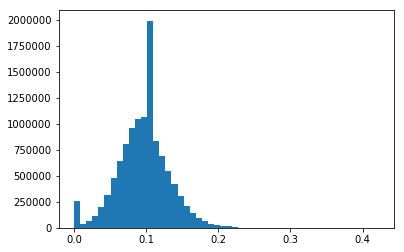

In [117]:
h = hist(coverage, bins=50)

In [126]:
coverage.mean()

0.095941734146084617

In [120]:
float(np.sum(coverage > 0.1))/coverage.shape[0]

0.4745730094028757

In [125]:
np.sum(~np.isnan(balanced_data))/float(balanced_data.shape[0])

0.095166773979128733

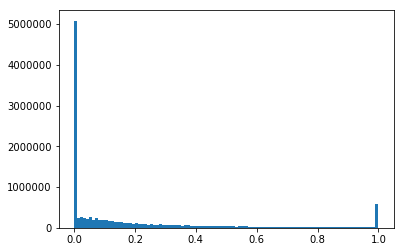

In [65]:
h = hist(icshape_data['feature']['icshape'][~np.isnan(icshape_data['feature']['icshape'])], bins=100)